In [1]:
#Llamamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
#Extraemos la base datos
df=pd.read_csv(r'C:\Users\TOSHIBA\Downloads\Ironhack\measurements.csv')
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
#Estandarizamos nombres de las columnas
df.columns=[c.lower().replace(' ', '_') for c in df.columns]
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
#Verificamos los tipos de valores
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
ac                int64
rain              int64
sun               int64
refill_liters    object
refill_gas       object
dtype: object

In [5]:
#Verificamos datos nulos
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [6]:
#Verificamos porcentajes de nulos en columnas
nulls_percent_df=pd.DataFrame(df.isnull().sum()/len(df)*100).reset_index()
nulls_percent_df.columns=['column_name','null_percentage']
nulls_percent_df

,column_name,null_percentage
0,distance,0.000000
1,consume,0.000000
2,speed,0.000000
3,temp_inside,3.092784
4,temp_outside,0.000000
5,specials,76.030928
6,gas_type,0.000000
7,ac,0.000000
8,rain,0.000000
9,sun,0.000000


In [7]:
#Eliminamos columnas con alta cantidad de nulos
df=df.drop(columns=['specials', 'refill_liters','refill_gas'],axis=1)
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,SP98,0,0,0
384,"16,1","4,3",38,25,31,SP98,1,0,0
385,16,"3,8",45,25,19,SP98,0,0,0
386,"15,4","4,6",42,25,31,SP98,1,0,0


In [8]:
#Reemplazamos comas por puntos
df=df.replace({',':'.'}, regex=True)
df.head()
#Opcion 2: df=df.replace({',':'.'}, regex=True)

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [9]:
#Corregimos el type de categorico a numerico
df['distance']=pd.to_numeric(df['distance'])
df['consume']=pd.to_numeric(df['consume'])
df['temp_inside']=pd.to_numeric(df['temp_inside'])

In [10]:
#Rellenamos nulos de columna 'temp_inside' con el promedio y verificamos que no haya nulos
df['temp_inside']=df['temp_inside'].replace(np.nan, np.mean(df['temp_inside']))
#Opcion 2: df['temp_inside']=df['temp_inside'].fillna(df['temp_inside'].mean())
df.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

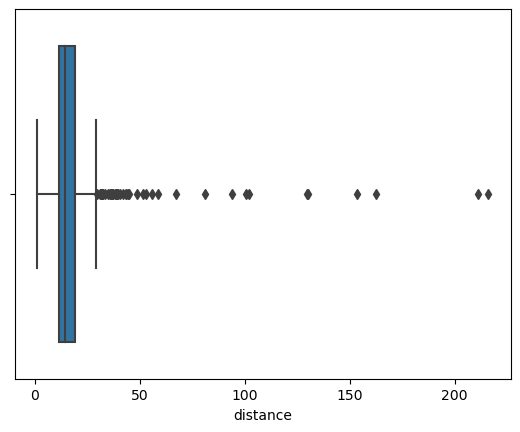

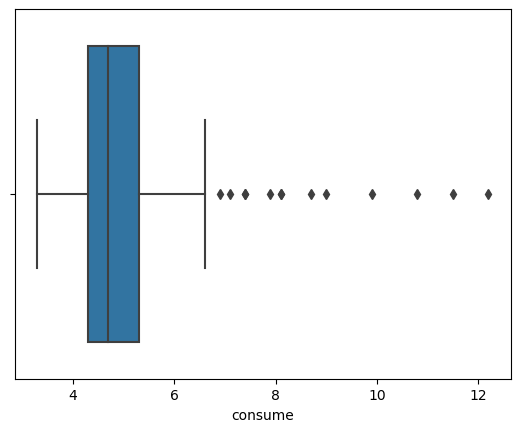

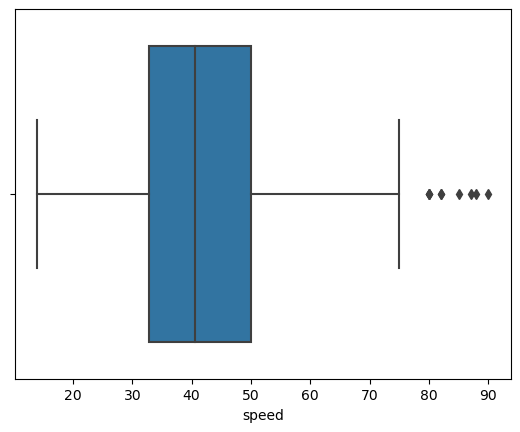

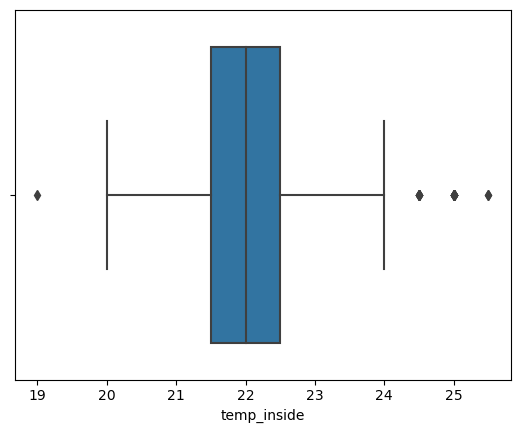

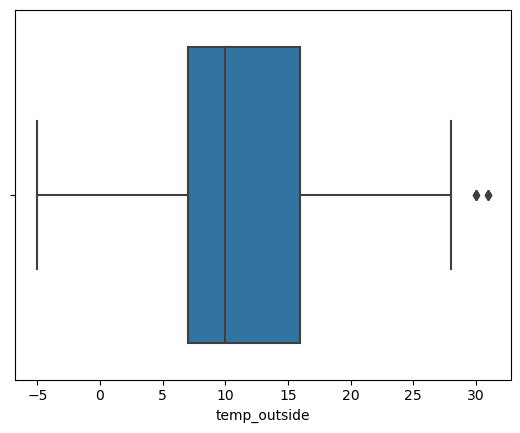

In [11]:
#Verificamos outliers
sns.boxplot(df['distance'])
plt.show()
sns.boxplot(df['consume'])
plt.show()
sns.boxplot(df['speed'])
plt.show()
sns.boxplot(df['temp_inside'])
plt.show()
sns.boxplot(df['temp_outside'])
plt.show()

In [12]:
#Removemos outliers en base de datos
for x in ['distance']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = df['distance'].mean() #Forma 1
    df.loc[df[x] > max,x] = np.mean(df['distance']) #Forma 2
    
#Funcion para remover outlier
#def re_outliers(x):
    #for i in x.select_dtypes(np.number):
        #q75, q25 = np.percentile(x[i].loc[:i],[75,25])
        #intr_qr = q75-q25
        #max = q75+(1.5*intr_qr)
        #min = q25-(1.5*intr_qr)

        #x.loc[x[i]< min,i] = np.mean(x[i])
        #x.loc[x[i]> max,i] = np.mean(x[i])
    #return x

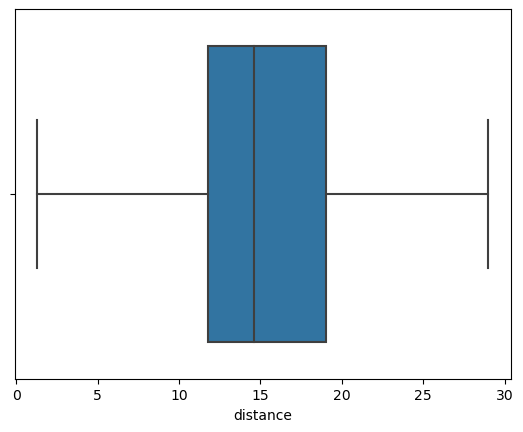

In [13]:
#Verificamos que se hayan ido los outliers
sns.boxplot(df['distance'])
plt.show()

In [14]:
for x in ['consume']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = df['consume'].mean()
    df.loc[df[x] > max,x] = df['consume'].mean()

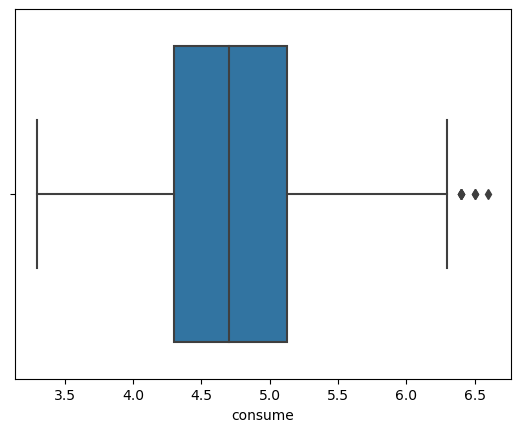

In [15]:
sns.boxplot(df['consume'])
plt.show()

In [16]:
for x in ['speed']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = df['speed'].mean()
    df.loc[df[x] > max,x] = df['speed'].mean()

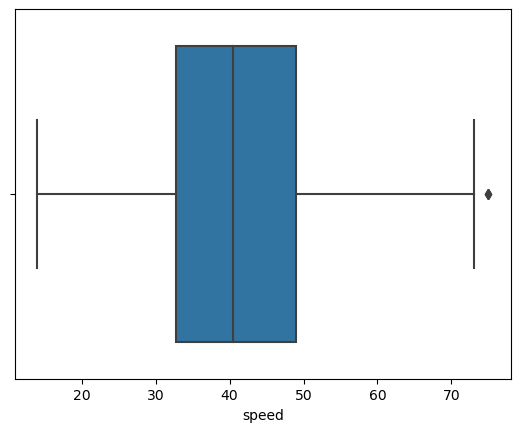

In [17]:
sns.boxplot(df['speed'])
plt.show()

In [18]:
for x in ['temp_inside']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = df['temp_inside'].mean()
    df.loc[df[x] > max,x] = df['temp_inside'].mean()

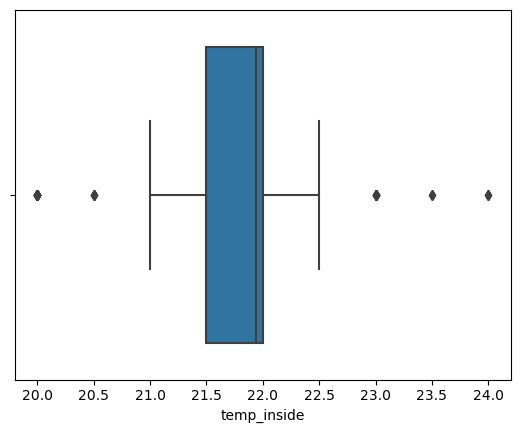

In [19]:
sns.boxplot(df['temp_inside'])
plt.show()

In [20]:
for x in ['temp_outside']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = df['temp_outside'].mean()
    df.loc[df[x] > max,x] = df['temp_outside'].mean()

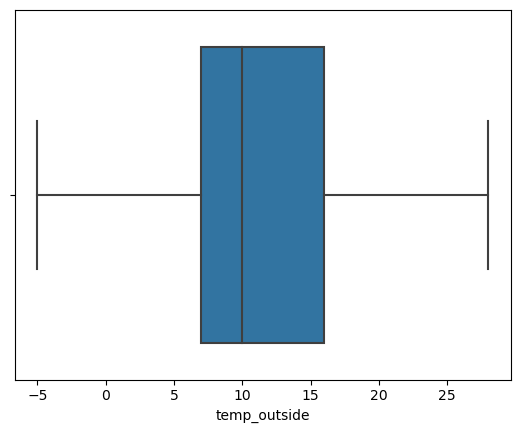

In [21]:
sns.boxplot(df['temp_outside'])
plt.show()

gas_type       E10      SP98
mean      4.825387  4.749118
median    4.800000  4.700000
amin      3.700000  3.300000
amax      6.500000  6.600000


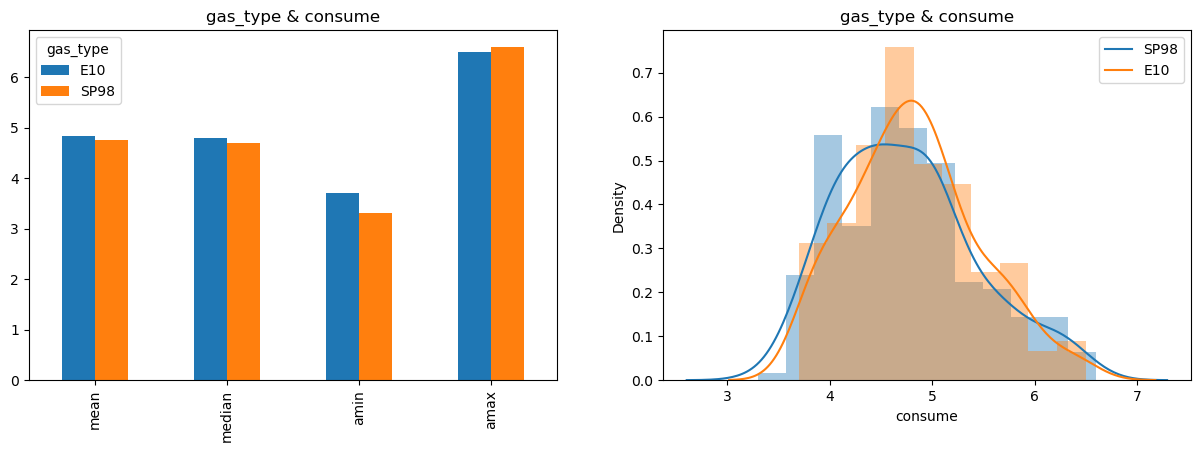

In [22]:
#Comparativa "gas_type" y "consume"
plt.figure(figsize=(15,10))
t=df[['consume','gas_type']]
ax1=plt.subplot(2,2,3)
c=df.groupby("gas_type")["consume"].agg([np.mean,np.median,np.min,np.max])

df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)

k1=df_T.plot(kind="bar",ax=ax1)
plt.title("gas_type & consume")

ax2=plt.subplot(2,2,4)

sns.distplot(t[t.gas_type=="SP98"]["consume"],ax=ax2)
sns.distplot(t[t.gas_type=="E10"]["consume"],ax=ax2)
plt.legend(["SP98","E10"])
plt.title("gas_type & consume")

plt.show()

In [ ]:
#Podemos constatar que la media y mediana de consumo en los dos tipos de gasolinas son bastante similares.
#En consumo, la gasolina E10 demanda mayor cantidad.

ac             0         1
mean    4.775485  4.841237
median  4.700000  4.856186
amin    3.300000  4.000000
amax    6.500000  6.600000


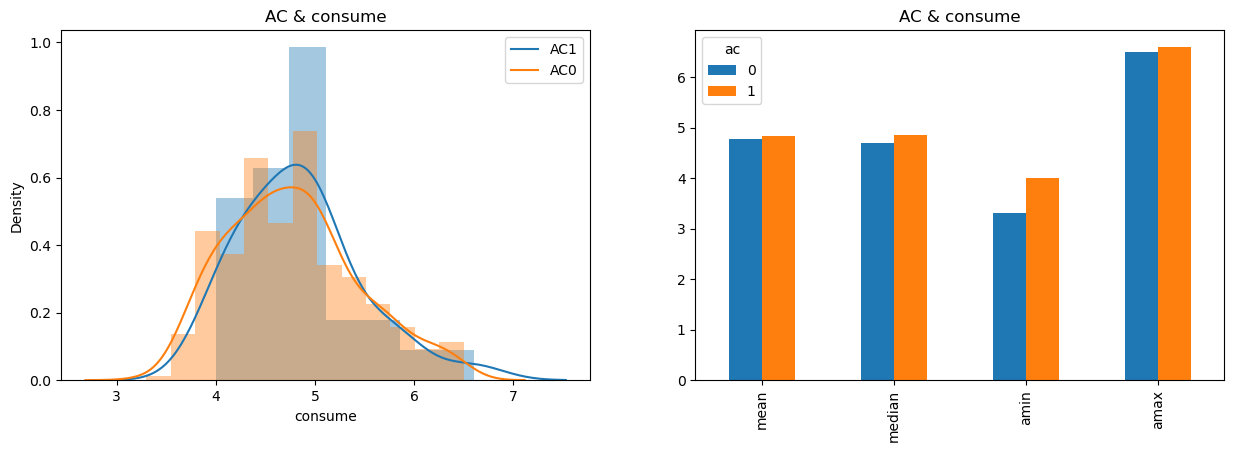

In [23]:
#Comparativa "ac" y "consume"
plt.figure(figsize=(15,10))

ax1=plt.subplot(2,2,1)
sns.distplot(df[df.ac==1].consume,ax=ax1)
sns.distplot(df[df.ac==0].consume,ax=ax1)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax2=plt.subplot(2,2,2)
c=df.groupby("ac")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)

k1=df_T.plot(kind="bar",ax=ax2)
plt.title("AC & consume")

plt.show()

In [ ]:
#El consumo de gas es mayor con el aire acondicionado encendido.

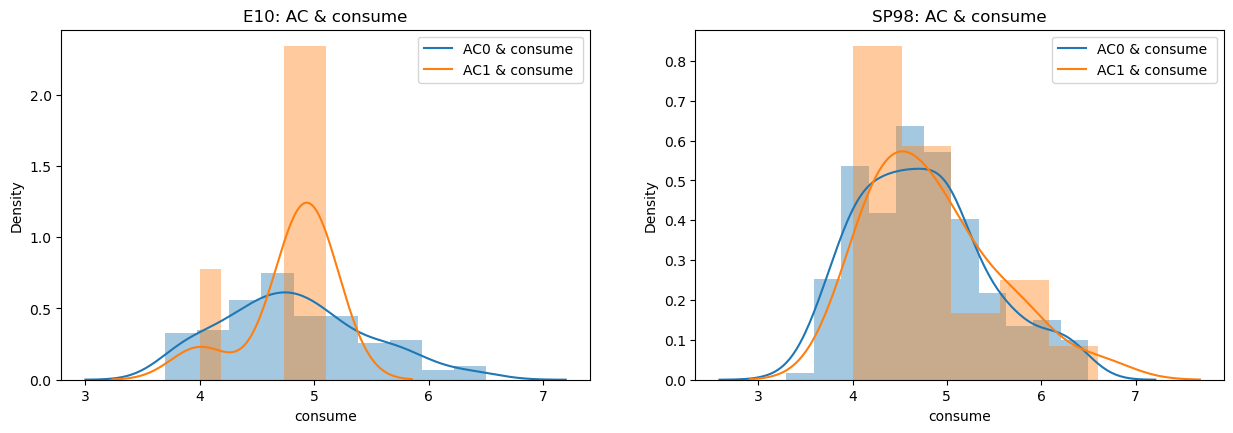

In [24]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(1,2,1)
sns.distplot(df[(df.ac==0)&(df.gas_type=="E10")].consume,ax=ax1)
sns.distplot(df[(df.ac==0)&(df.gas_type=="SP98")].consume,ax=ax1)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("AC0: gas_type & consume")

ax2=plt.subplot(1,2,2)
sns.distplot(df[(df.ac==1)&(df.gas_type=="E10")].consume,ax=ax2)
sns.distplot(df[(df.ac==1)&(df.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("AC1: gas_type & consume")

ax3=plt.subplot(2,2,3)
sns.distplot(df[(df.ac==0)&(df.gas_type=="E10")].consume,ax=ax3)
sns.distplot(df[(df.ac==1)&(df.gas_type=="E10")].consume,ax=ax3)
plt.legend(["AC0 & consume ","AC1 & consume"])
plt.title("E10: AC & consume")

ax4=plt.subplot(2,2,4)
sns.distplot(df[(df.ac==0)&(df.gas_type=="SP98")].consume,ax=ax4)
sns.distplot(df[(df.ac==1)&(df.gas_type=="SP98")].consume,ax=ax4)
plt.legend(["AC0 & consume ","AC1 & consume"])
plt.title("SP98: AC & consume")

plt.show()

In [ ]:
#El consumo de E10 con el ac encendido es mas del doble que el consumo de SP98 con el ac encendido.

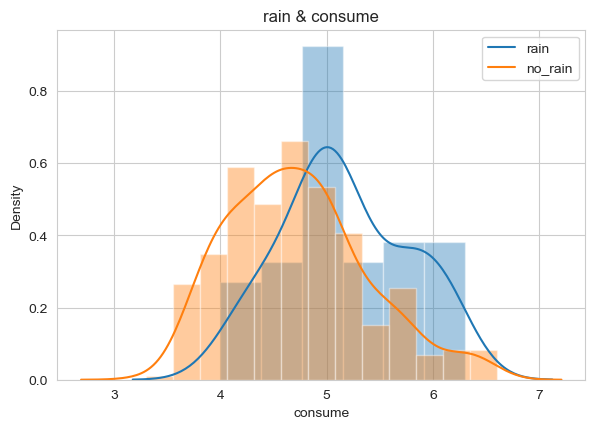

In [59]:
#Rain
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[df.rain==1].consume,ax=ax1)
sns.distplot(df[df.rain==0].consume,ax=ax1)
plt.legend(["rain","no_rain"])
plt.title("rain & consume")

plt.show()

In [ ]:
#Como era de esperarse, el consumo de ambos combustibles bajo presencia de lluvia es mayor.

Text(0.5, 1.0, 'SP98: rain & consume')

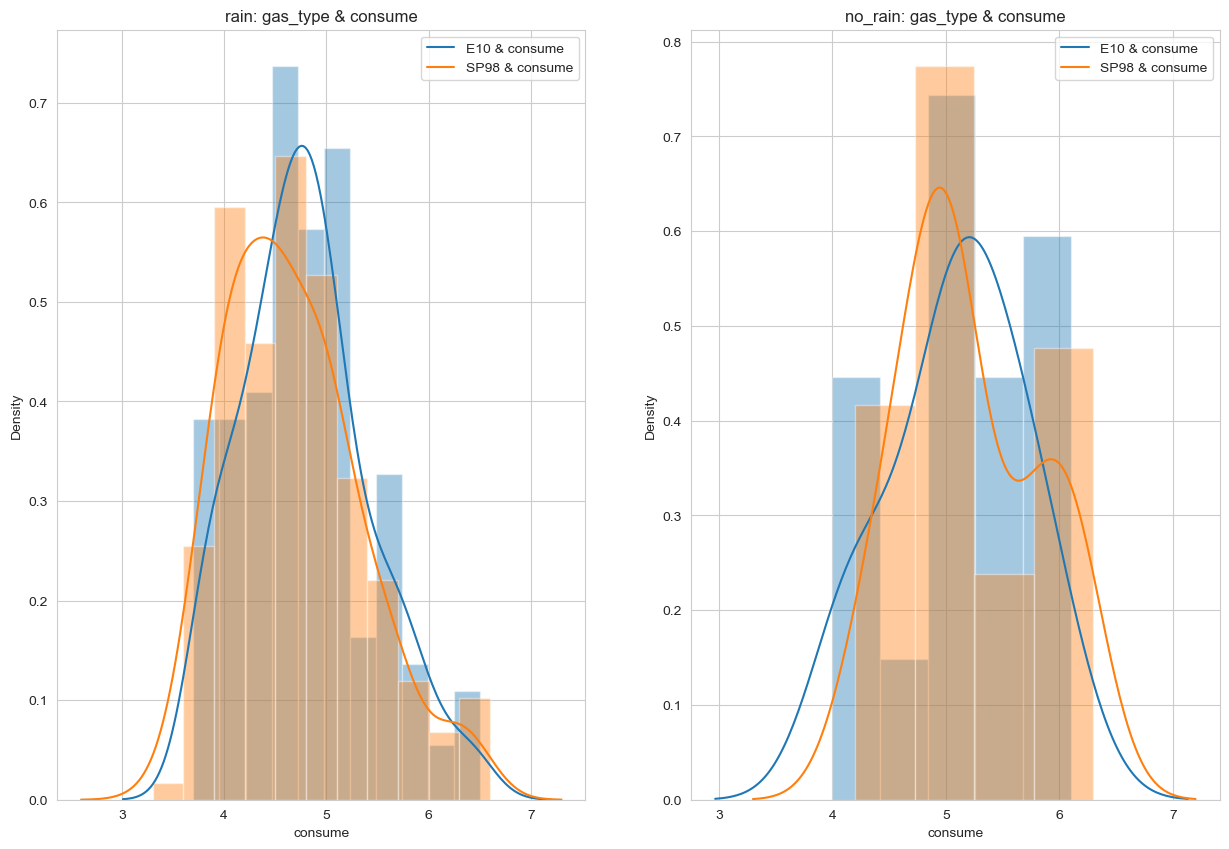

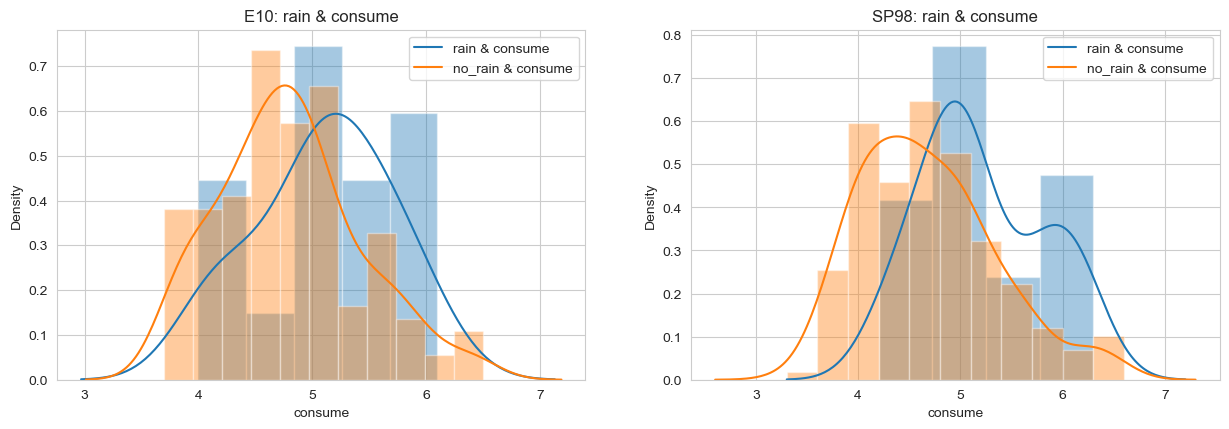

In [60]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(1,2,1)
sns.distplot(df[(df.rain==0)&(df.gas_type=="E10")].consume,ax=ax1)
sns.distplot(df[(df.rain==0)&(df.gas_type=="SP98")].consume,ax=ax1)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("rain: gas_type & consume")

ax2=plt.subplot(1,2,2)
sns.distplot(df[(df.rain==1)&(df.gas_type=="E10")].consume,ax=ax2)
sns.distplot(df[(df.rain==1)&(df.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("no_rain: gas_type & consume")

plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[(df.rain==1)&(df.gas_type=="E10")].consume,ax=ax1)
sns.distplot(df[(df.rain==0)&(df.gas_type=="E10")].consume,ax=ax1)
plt.legend(["rain & consume ","no_rain & consume"])
plt.title("E10: rain & consume")

ax2=plt.subplot(2,2,2)
sns.distplot(df[(df.rain==1)&(df.gas_type=="SP98")].consume,ax=ax2)
sns.distplot(df[(df.rain==0)&(df.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["rain & consume ","no_rain & consume"])
plt.title("SP98: rain & consume")

In [ ]:
#Bajo condiciones de lluvia, el consumo de E10 es mayor al de SP98.
#Sin lluvia, el consumo de SP98 es mayor al de E10.
#El consumo de E10 sin presencia de lluvia es MENOR al que se presenta con lluvia.
##El consumo de SP98 con presencia de lluvia es mayor al que se presenta sin lluvia.

Text(0.5, 1.0, 'sun & consume')

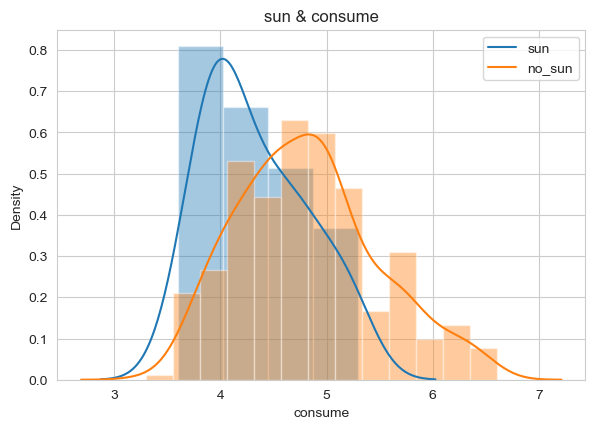

In [61]:
#Sun
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[df.sun==1].consume,ax=ax1)
sns.distplot(df[df.sun==0].consume,ax=ax1)
plt.legend(["sun","no_sun"])
plt.title("sun & consume")

In [ ]:
#El consumo de combustible es mayor ante la presencia del sol que sin ella.

Text(0.5, 1.0, 'SP98: sun & consume')

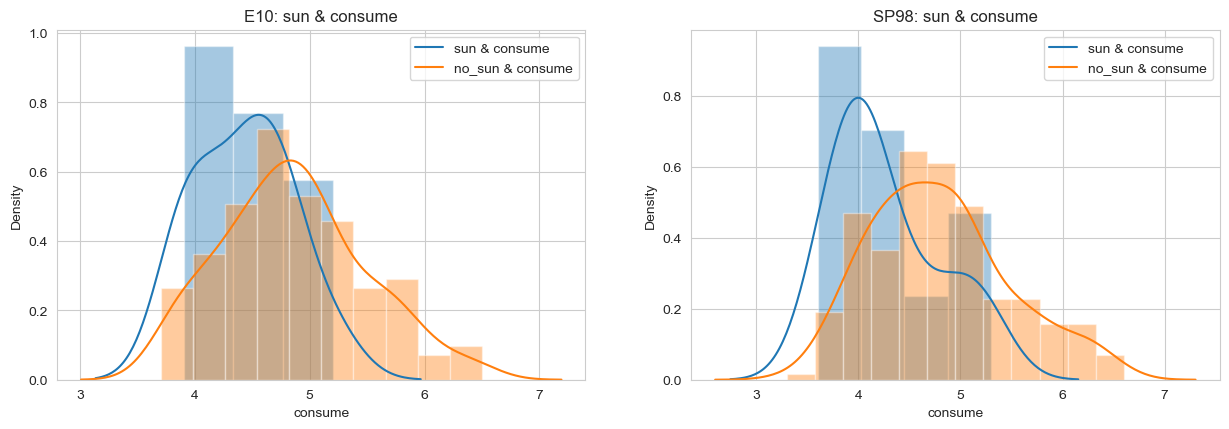

In [63]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[(df.sun==1)&(df.gas_type=="E10")].consume,ax=ax1)
sns.distplot(df[(df.sun==0)&(df.gas_type=="E10")].consume,ax=ax1)
plt.legend(["sun & consume ","no_sun & consume"])
plt.title("E10: sun & consume")

ax2=plt.subplot(2,2,2)
sns.distplot(df[(df.sun==1)&(df.gas_type=="SP98")].consume,ax=ax2)
sns.distplot(df[(df.sun==0)&(df.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["sun & consume ","no_sun & consume"])
plt.title("SP98: sun & consume")

In [ ]:
#El consumo de E10 y SP98 es menor sin la presencia de sol.

Text(0.5, 1.0, '1/distance & consume')

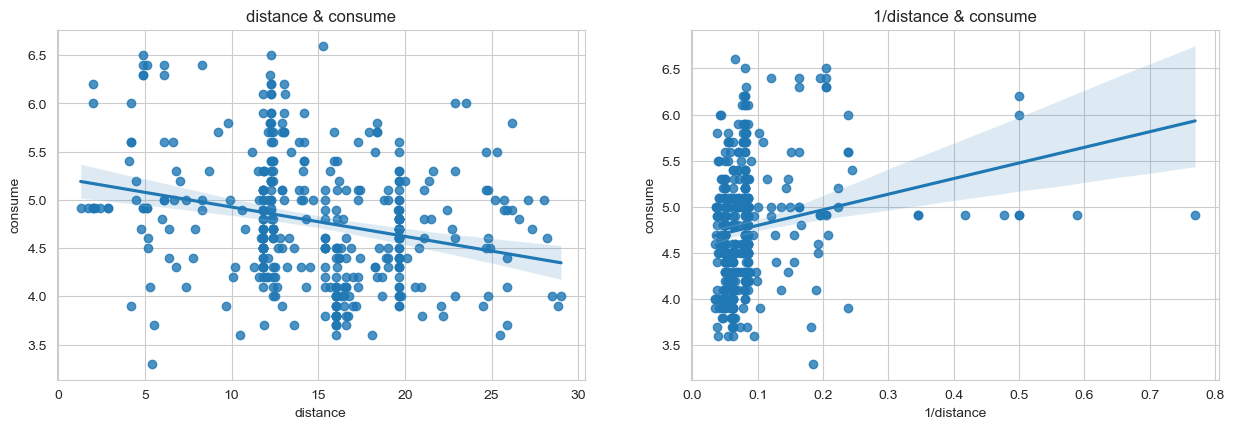

In [52]:
#Distance and consume
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
#regression line scatterplot：
sns.regplot(x=df['distance'], y=df['consume'],ax=ax1)
plt.xlabel("distance")
plt.ylabel("consume")
plt.title("distance & consume")
ax2=plt.subplot(2,2,2)
sns.regplot(x=1/df['distance'], y=df['consume'],ax=ax2)
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.title("1/distance & consume")

Text(0.5, 1.0, '1/distance & consume')

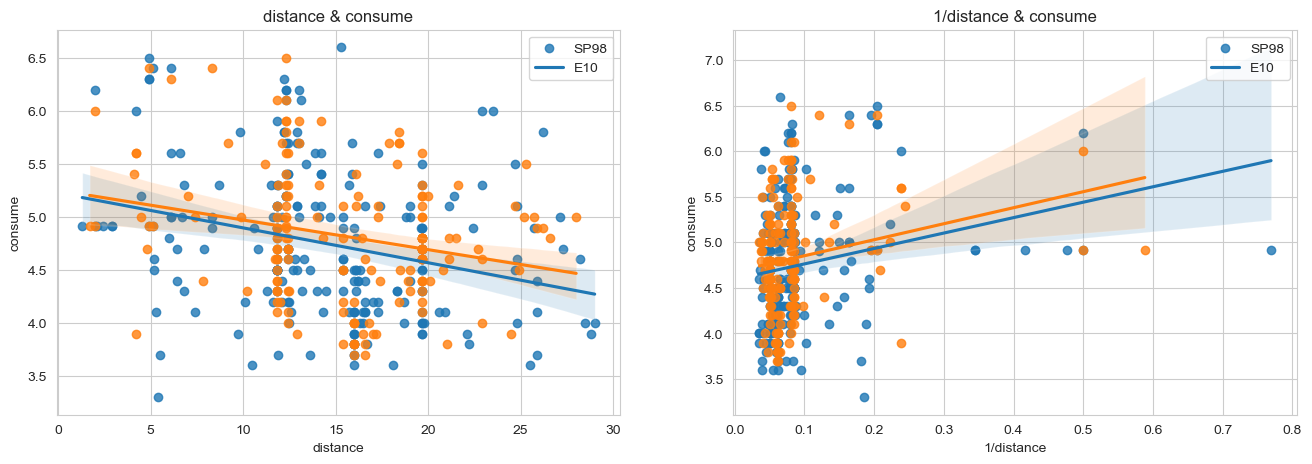

In [53]:
# distance&consume
plt.figure(figsize=(16,5))
ax1=plt.subplot(1,2,1)
# 包含单regression line的scatterplot：
sns.regplot(x=df[df["gas_type"]=="SP98"]['distance'], y=df[df["gas_type"]=="SP98"]['consume'],ax=ax1)
sns.regplot(x=df[df["gas_type"]=="E10"]['distance'], y=df[df["gas_type"]=="E10"]['consume'],ax=ax1)
plt.legend(["SP98","E10"])
plt.xlabel("distance")
plt.ylabel("consume")
plt.title("distance & consume")

ax2=plt.subplot(1,2,2)
sns.regplot(x=1/df[df["gas_type"]=="SP98"]['distance'], y=df[df["gas_type"]=="SP98"]['consume'],ax=ax2)
sns.regplot(x=1/df[df["gas_type"]=="E10"]['distance'], y=df[df["gas_type"]=="E10"]['consume'],ax=ax2)
plt.legend(["SP98","E10"])
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.title("1/distance & consume")

Text(0.5, 1.0, 'speed & consume')

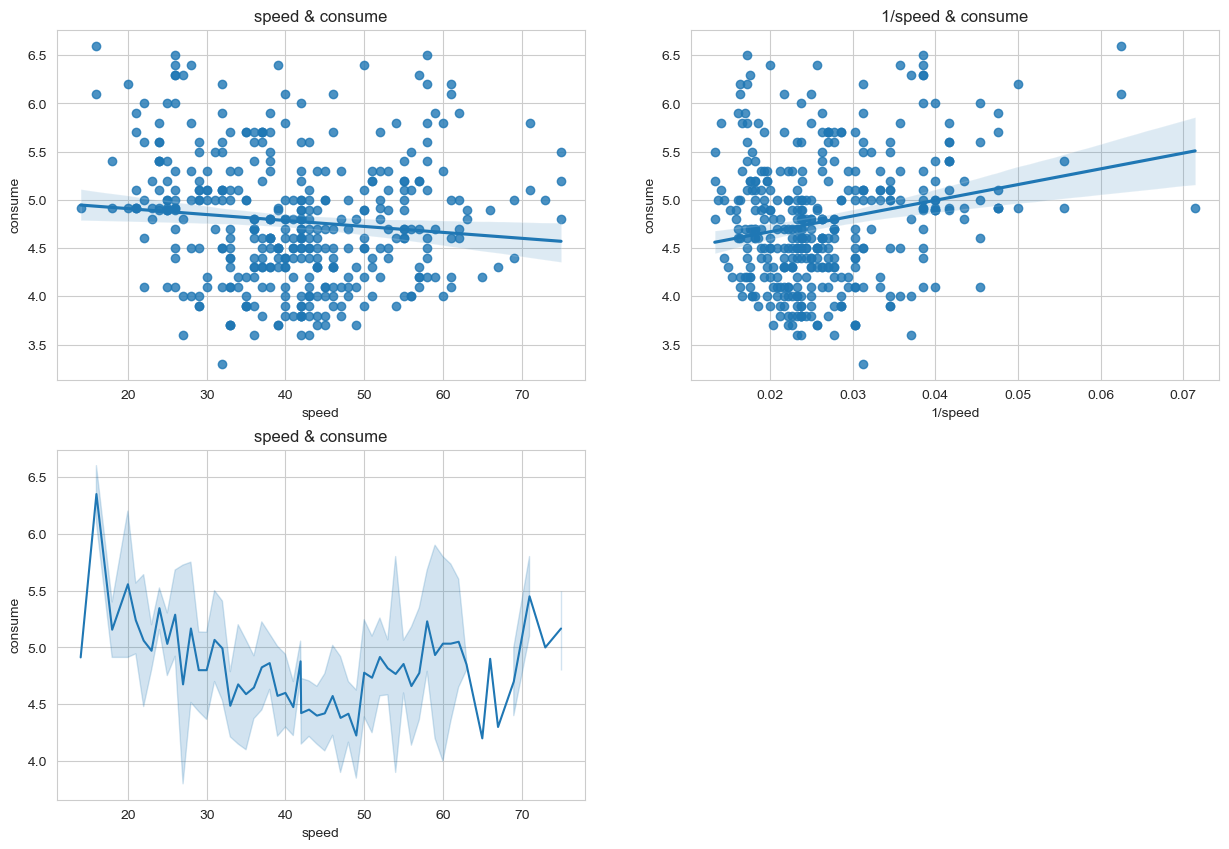

In [55]:
# speed&consume
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)

sns.regplot(x=df['speed'], y=df['consume'],ax=ax1)
plt.xlabel("speed")
plt.ylabel("consume")
plt.title("speed & consume")
ax2=plt.subplot(2,2,2)
sns.regplot(x=1/df['speed'], y=df['consume'],ax=ax2)
plt.xlabel("1/speed")
plt.ylabel("consume")
plt.title("1/speed & consume")
ax3=plt.subplot(2,2,3)
sns.lineplot(x=df['speed'], y=df['consume'],ax=ax3)
plt.title("speed & consume")

Text(0.5, 1.0, 'speed & consume')

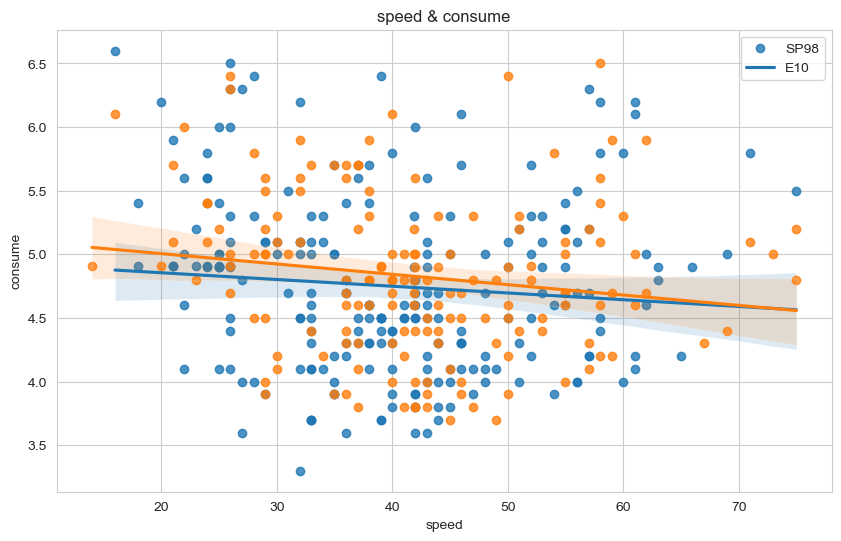

In [56]:
#speed&consume
plt.figure(figsize=(10,6))
#Regression line scatterplot：
sns.regplot(x=df[df["gas_type"]=="SP98"]['speed'], y=df[df["gas_type"]=="SP98"]['consume'])
sns.regplot(x=df[df["gas_type"]=="E10"]['speed'], y=df[df["gas_type"]=="E10"]['consume'])
plt.legend(["SP98","E10"])
plt.xlabel("speed")
plt.ylabel("consume")
plt.title("speed & consume")

Text(0.5, 1.0, 'temp_outside & consume')

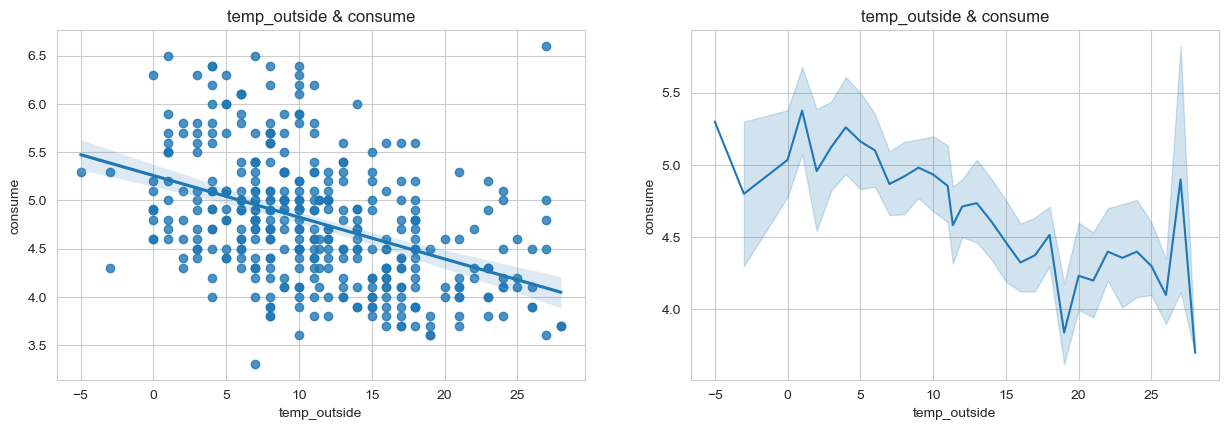

In [64]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)

sns.regplot(x=df['temp_outside'], y=df['consume'],ax=ax1)
plt.xlabel("temp_outside")
plt.ylabel("consume")
plt.title("temp_outside & consume")
ax2=plt.subplot(2,2,2)
sns.lineplot(x=df['temp_outside'], y=df['consume'],ax=ax2)
plt.title("temp_outside & consume")

Text(0.5, 1.0, 'E10:temp_outside & consume')

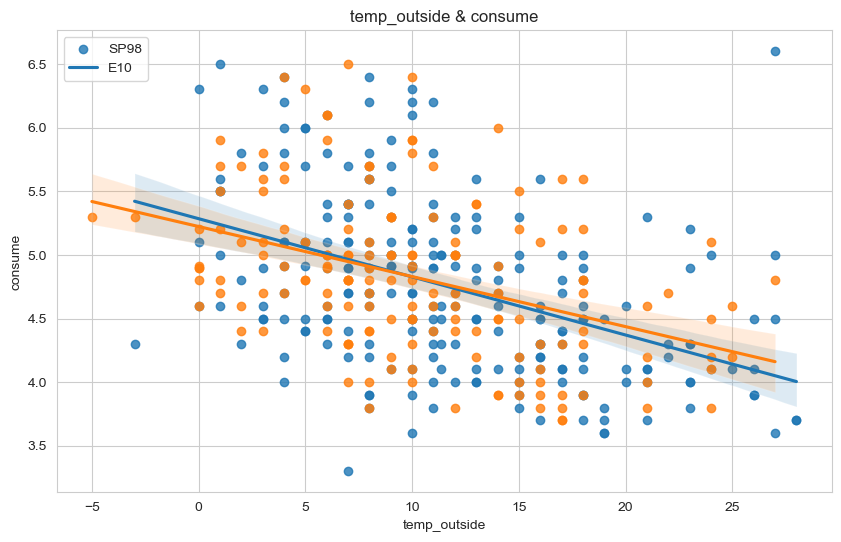

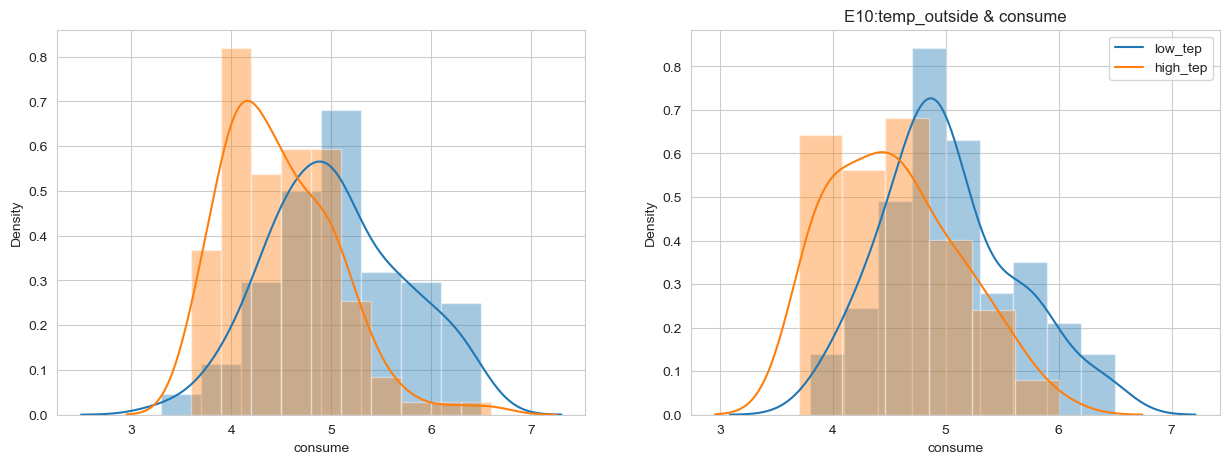

In [65]:
# temp&consume
plt.figure(figsize=(10,6))
#Regression line scatterplot：
sns.regplot(x=df[df["gas_type"]=="SP98"]['temp_outside'], y=df[df["gas_type"]=="SP98"]['consume'])
sns.regplot(x=df[df["gas_type"]=="E10"]['temp_outside'], y=df[df["gas_type"]=="E10"]['consume'])
plt.legend(["SP98","E10"])
plt.xlabel("temp_outside")
plt.ylabel("consume")
plt.title("temp_outside & consume")

plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
sns.distplot(df[(df["temp_outside"]<=10)&(df["gas_type"]=="SP98")]['consume'],ax=ax1)
sns.distplot(df[(df["temp_outside"]>10)&(df["gas_type"]=="SP98")]['consume'],ax=ax1)
plt.legend(["low_tep","high_tep"])
plt.title("SP98:temp_outside & consume")

sns.distplot(df[(df["temp_outside"]<=10)&(df["gas_type"]=="E10")]['consume'],ax=ax2)
sns.distplot(df[(df["temp_outside"]>10)&(df["gas_type"]=="E10")]['consume'],ax=ax2)
plt.legend(["low_tep","high_tep"])
plt.title("E10:temp_outside & consume")

In [26]:
#Separamos data numerica
numerical=df.select_dtypes(exclude=["object"])
numerical

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,28.0,5.0,26.0,21.500000,12.000000,0,0,0
1,12.0,4.2,30.0,21.500000,13.000000,0,0,0
2,11.2,5.5,38.0,21.500000,15.000000,0,0,0
3,12.9,3.9,36.0,21.500000,14.000000,0,0,0
4,18.5,4.5,46.0,21.500000,15.000000,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39.0,21.937072,18.000000,0,0,0
384,16.1,4.3,38.0,21.937072,11.358247,1,0,0
385,16.0,3.8,45.0,21.937072,19.000000,0,0,0
386,15.4,4.6,42.0,21.937072,11.358247,1,0,0


In [27]:
#Separamos data categorica
categorical=df.select_dtypes(include=["object"])
categorical

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10
...,...
383,SP98
384,SP98
385,SP98
386,SP98


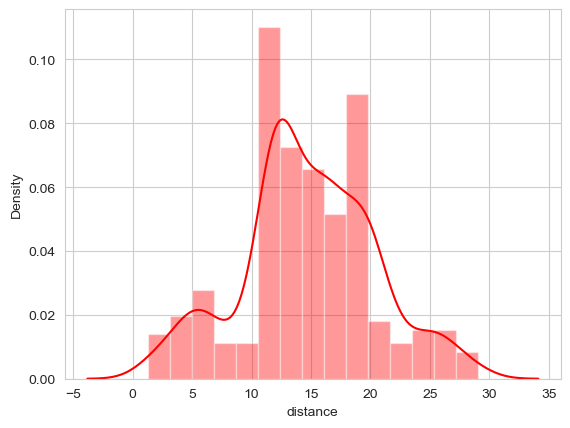

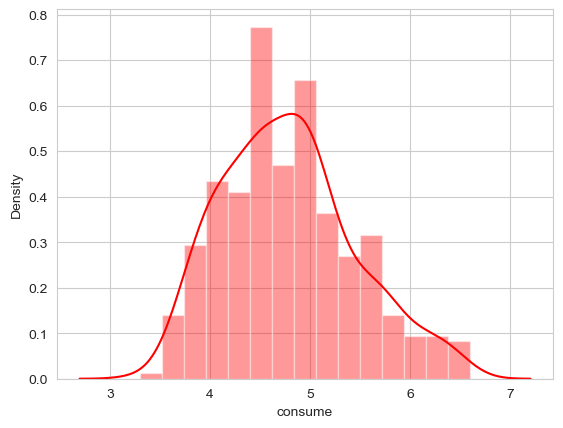

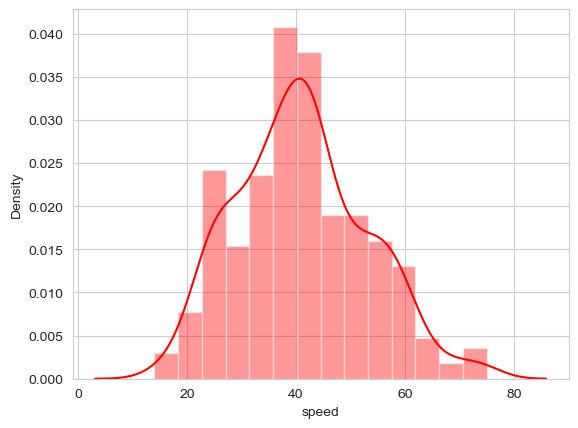

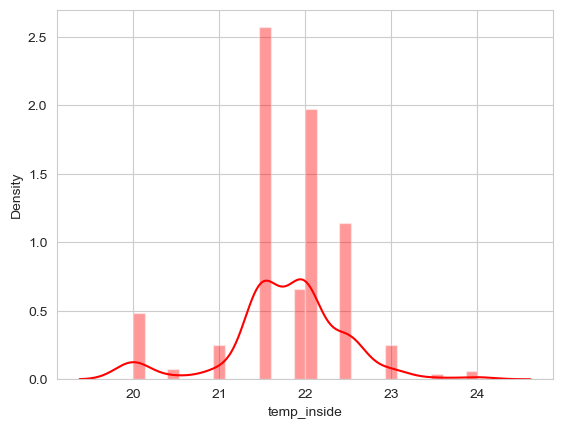

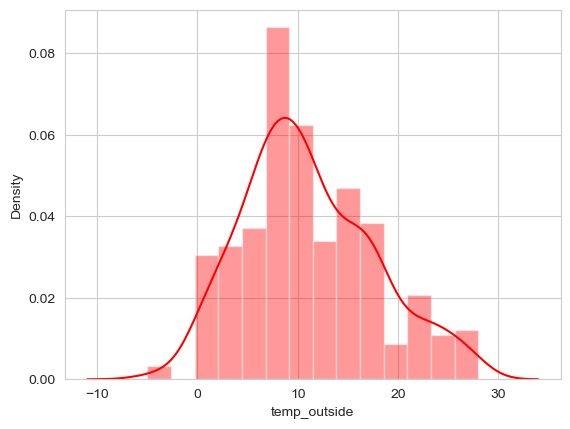

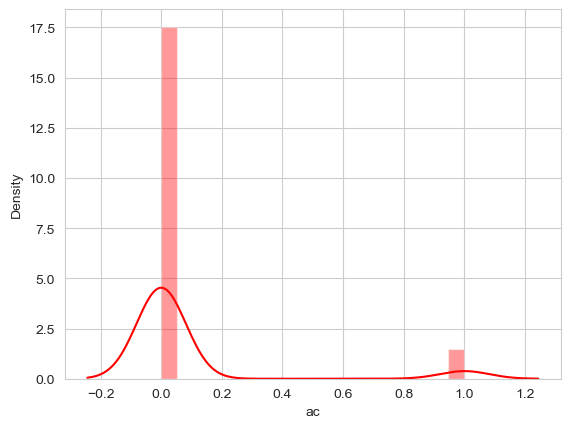

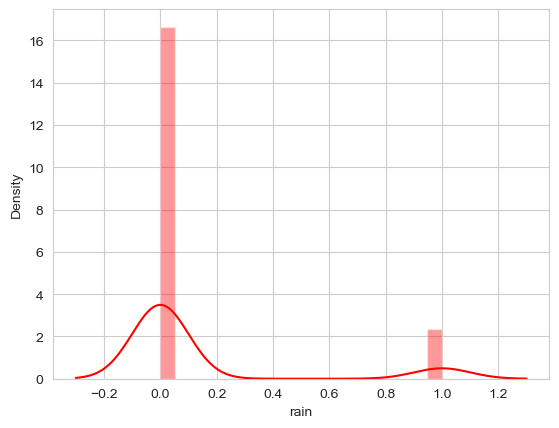

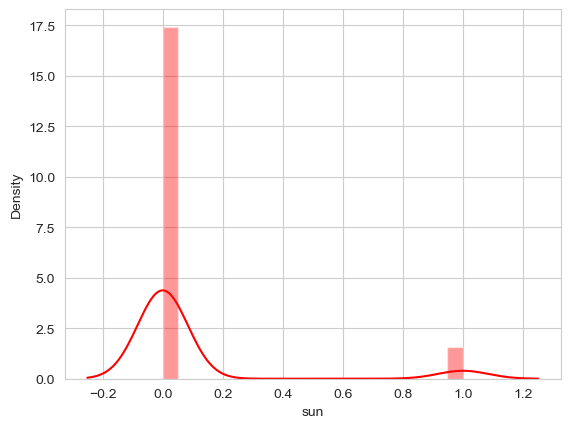

In [28]:
#Graficamos para ver que tanto se parecen los valores de cada columna a una distribucion normal
sns.set_style("whitegrid")
for i in numerical.columns:
    sns.distplot(numerical[i], color='red')
    plt.show()

In [29]:
#Vamos a normalizar los valores numericos
transformer=Normalizer().fit(numerical)
x_norm=transformer.transform(numerical)
x_norm=pd.DataFrame(x_norm)
x_norm=x_norm.set_axis(['distance','consume','speed','temp_inside','temp_outside','ac','rain','sun'],axis=1)
x_norm

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,0.612287,0.109337,0.568552,0.470149,0.262409,0.000000,0.0,0.0
1,0.291653,0.102079,0.729133,0.522545,0.315958,0.000000,0.0,0.0
2,0.234202,0.115010,0.794614,0.449584,0.313663,0.000000,0.0,0.0
3,0.279127,0.084387,0.778960,0.465212,0.302929,0.000000,0.0,0.0
4,0.328801,0.079979,0.817560,0.382120,0.266596,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
383,0.314032,0.072620,0.765453,0.430559,0.353286,0.000000,0.0,0.0
384,0.333329,0.089026,0.786740,0.454178,0.235158,0.020704,0.0,0.0
385,0.285638,0.067839,0.803357,0.391629,0.339195,0.000000,0.0,0.0
386,0.300088,0.089637,0.818422,0.427471,0.221330,0.019486,0.0,0.0


In [30]:
#Hacemos label encoding para la data categorica
labels=categorical.apply(preprocessing.LabelEncoder().fit_transform)
labels

,gas_type
0,0
1,0
2,0
3,0
4,0
...,...
383,1
384,1
385,1
386,1


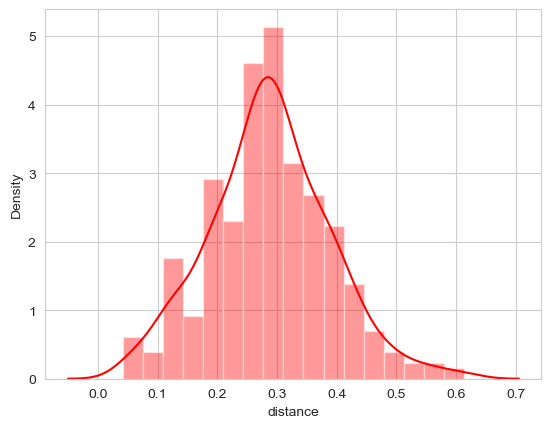

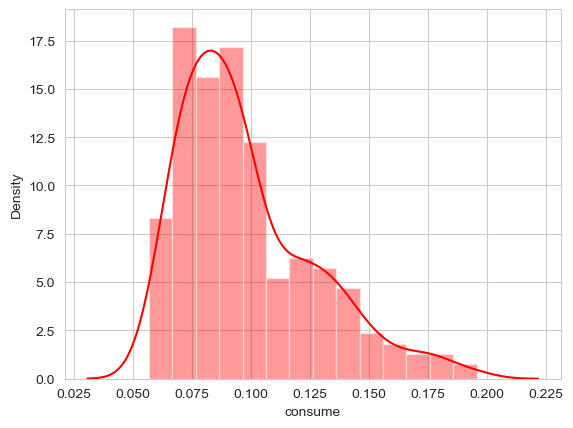

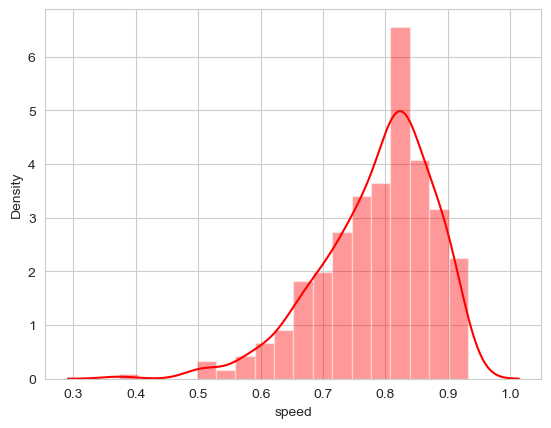

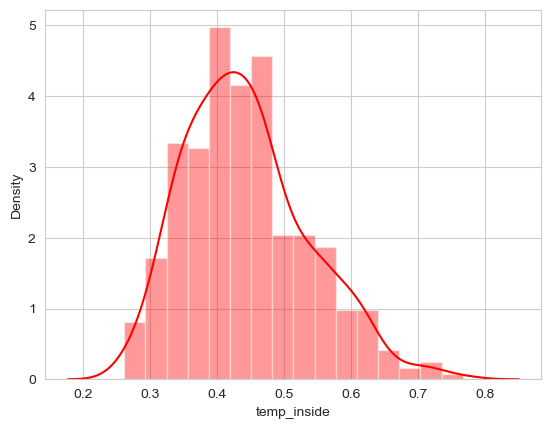

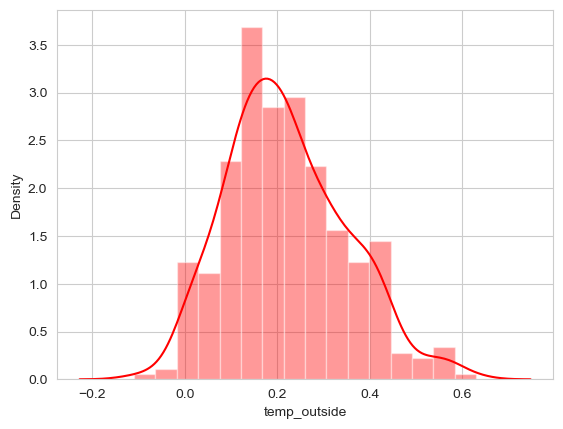

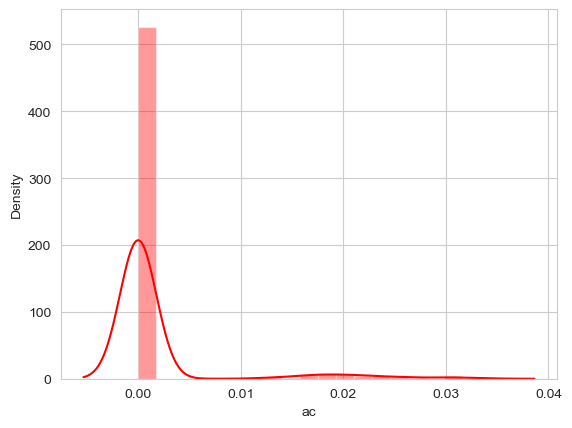

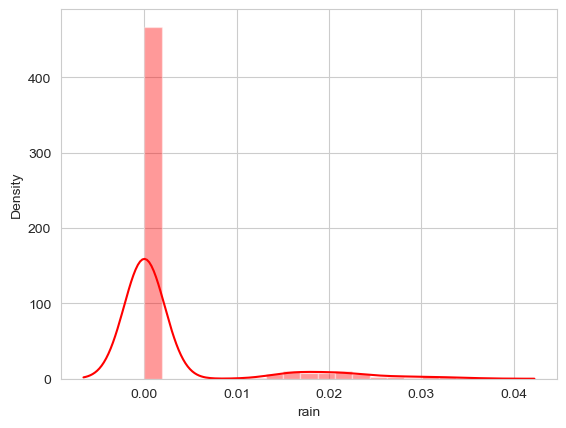

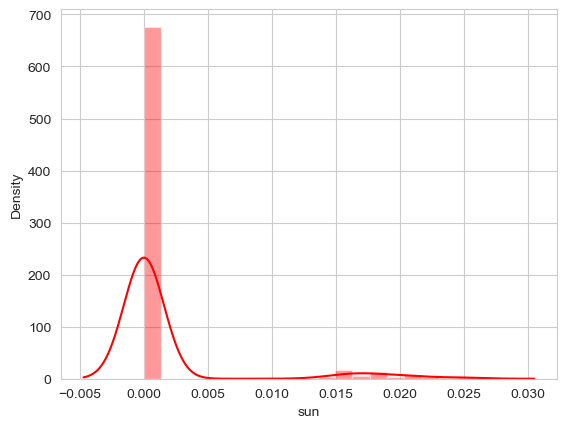

In [31]:
#Graficamos la data normalizada para ver que tanto los valores se parecen a una distribucion normal
sns.set_style("whitegrid")
for i in x_norm.columns:
    sns.distplot(x_norm[i], color='red')
    plt.show()

In [32]:
#Identificamos X y y (no hay necesidad de concatenar ya que nuestro target es la unica variable categorica)
X=x_norm
y=labels

In [33]:
#Sacamos matriz de correlacion para determinar la multicolinearidad entre las columnas
corr_matrix= X.corr()
upper= corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

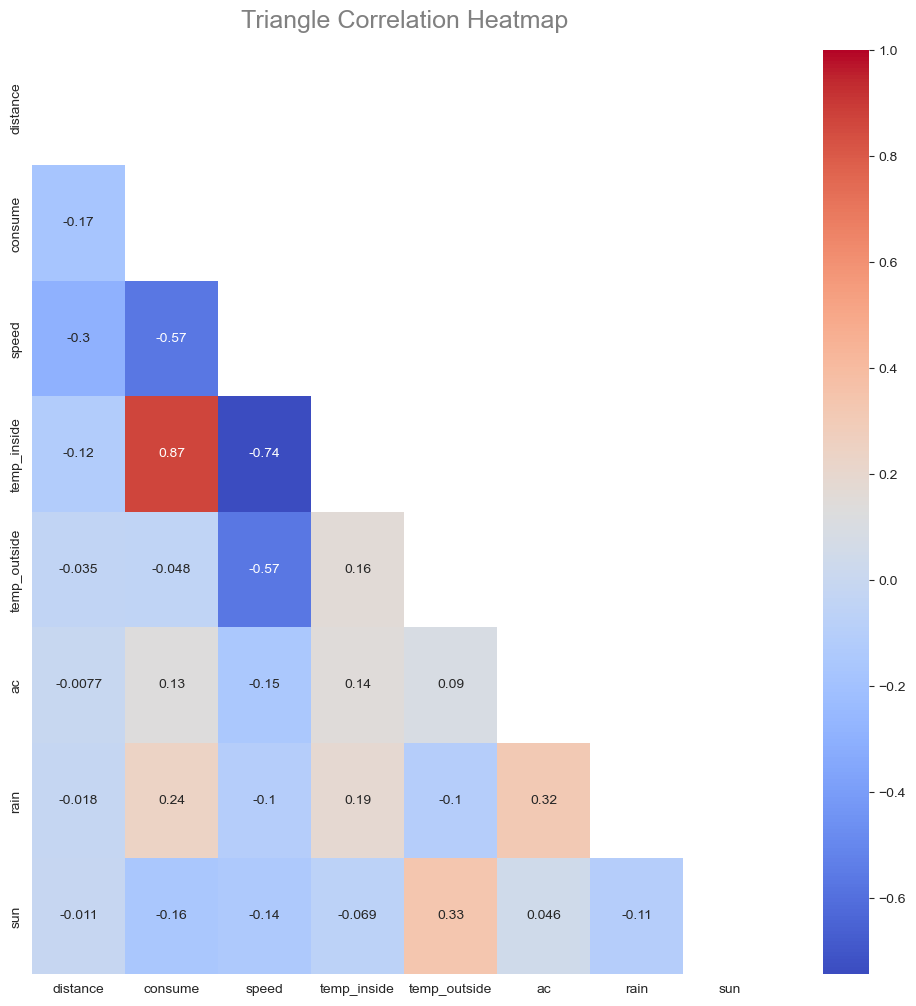

In [34]:
plt.figure(figsize=(12,12))
mascara=np.triu(np.ones_like(X.corr(), dtype=np.bool)) # aislar el triángulo superior de una matriz mientras convierte todos los valores en el triángulo inferior en 
heatmap = sns.heatmap(X.corr(), mask=mascara, vmax=1, annot=True, cmap='coolwarm') #podemos establecer el valor maximo y minimo
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16, color='grey')

In [35]:
#Hacemos el split de la data normalizada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [36]:
#Aplicamos modelo de regresion lineal
lm=linear_model.LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
#Modelo entrenamiento
pred_train=lm.predict(X_train)
print ("Data train")
print('Testing R2 Score:', r2_score(y_train,pred_train))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train,pred_train)))
print('Testing MAE:', mean_absolute_error(y_train, pred_train))
print('Testing MSE:', mean_squared_error(y_train, pred_train))
print('------------------------------')
#Modelo prueba
pred_test=lm.predict(X_test)
print ("Data test")
print('Testing R2 Score:', r2_score(y_test,pred_test))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, pred_test)))
print('Testing MAE:', mean_absolute_error(y_test, pred_test))
print('Testing MSE:', mean_squared_error(y_test, pred_test))

Data train
Testing R2 Score: 0.0338534184773881
Testing RMSE: 0.4833783804650448
Testing MAE: 0.46730931740201914
Testing MSE: 0.2336546587010096
------------------------------
Data test
Testing R2 Score: 0.01105978899067328
Testing RMSE: 0.4913077808537378
Testing MAE: 0.47034214388181705
Testing MSE: 0.24138333552742444


In [39]:
#Probamos con modelo de regresion logistica
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=69)
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

LogisticRegression()

In [40]:
y_pred = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.60
